In [10]:
import pandas as pd 
df = pd.read_csv('avg_hourly.csv')
df.head()

,DATE,SMU26114600500000003SA
0,2007-01-01,25.641903
1,2007-02-01,25.861740
2,2007-03-01,26.152952
3,2007-04-01,26.343864
4,2007-05-01,26.233737


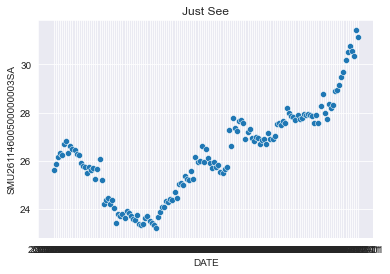

In [14]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load dataset
df = pd.read_csv('avg_hourly.csv')

# draw a line plot
sns.set_style("darkgrid")
sns.scatterplot(x="DATE", y="SMU26114600500000003SA"  ,data=df )
plt.title("Just See")
plt.show()

In [7]:
df = pd.read_csv('avg_weekly.csv')
df.head()

,DATE,ENUC114640510
0,1990-01-01,512
1,1990-04-01,517
2,1990-07-01,516
3,1990-10-01,549
4,1991-01-01,489


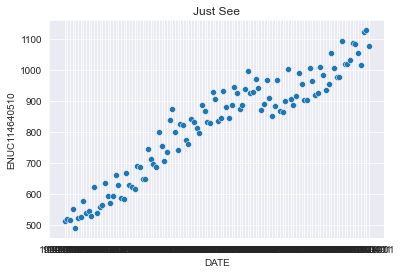

In [13]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load dataset
df = pd.read_csv('avg_weekly.csv')

# draw a line plot
sns.set_style("darkgrid")
sns.scatterplot(x="DATE", y="ENUC114640510"  ,data=df )
plt.title("Just See")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet


import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('avg_weekly.csv')

    station_locations_by_hash = df[df['ENUC114640510'] == hashid]

    lons = station_locations_by_hash['ENUC114640510'].tolist()
    lats = station_locations_by_hash['ENUC114640510'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('avg_hourly.csv')

    station_locations_by_hash = df[df['SMU26114600500000003SA'] == hashid]

    lons = station_locations_by_hash['SMU26114600500000003SA'].tolist()
    lats = station_locations_by_hash['SMU26114600500000003SA'].tolist()

    #plt.figure(figsize=(8,8))

    #plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    #---my code---
    #1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph 
    #of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record 
    #high and record low temperatures for each day should be shaded.
    
    df2 = pd.read_csv('avg_weekly.csv')
    df2['Date'] = pd.to_datetime(df2['Date'])
    
    df2[(df2['Date'] > '2005-01-01') & (df2['Date'] < '2014-12-31')]
    #sorting by date to make the data reading easier
    df2 = df2.sort_values(by="Date")
    
    #groupyingby the min and max
    df2 = df2.groupby('Date')['Data_Value'].agg([('TMIN','min'), ('TMAX','max')])
    
    #this other syntaxis is valid, but due to the version of the current library it causes an error, that's why I used the 
    #method above
    
    #df2.groupby('Date').agg(TMIN = ('Data_Value', 'min'), TMAX = ('Data_Value', 'max'))
    
    #reseting the index so I can use the dates further on
    df2 = df2.reset_index()
    
    #creating the line graph
    ax1 = df2.plot(x ='DATE', y='SMU26114600500000003SA', kind = 'line')
    ax2 = df2.plot(x ='DATE', y='SMU26114600500000003SA',secondary_y=True, ax=ax1)

    y1 = df2['TMIN']
    y2 = df2['TMAX']
    
    #to calculate the position in scale
    ny = ((y2-np.min(y2))/(np.max(y2)-np.min(y2)))*(np.max(y1)-np.min(y1))+np.min(y1)
    
    #shading between spaces
    #ax1.fill_between(df2['Date'],y1,ny, where=y1<=ny, interpolate=True, color='grey', alpha=0.5)
    #ax1.fill_between(df2['Date'],y1,ny, where=y1>=ny, interpolate=True, color='grey', alpha=0.5)
    plt.fill_between(df2['TMIN'],df2['TMAX'], interpolate=True, color='grey', alpha=0.5)
    
    plt.xlabel('Year Interval')
    plt.ylabel('Temperature Frequency')
    plt.title('Record high and record low temperatures by day of the year over the period 2005-2014')

    
    #2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record 
    #high or record low was broken in 2015.
    
    TMIN2015 = pd.read_csv('avg_weekly.csv')
    TMIN2015['DATE'] = pd.to_datetime(TMIN2015['DATE'])
    TMIN2015 = TMIN2015[(TMIN2015['DATE'] > '2015-01-01') & (TMIN2015['Date'] < '2015-12-31')]
    TMIN2015 = TMIN2015.sort_values(by="DATE")
    TMIN2015 = TMIN2015.groupby('DATE')['Data_Value'].agg([('TMIN','min'), ('TMAX','max')])
    TMIN2015 = TMIN2015.reset_index()
    
    ax3 = TMIN2015.plot.scatter(x ='DATE', y='SMU26114600500000003SA',secondary_y=True, ax=ax1)
    ax4 = TMIN2015.plot.scatter(x ='DATE', y='SMU26114600500000003SA',secondary_y=True, ax=ax1)
    
    return plt.show()

leaflet_plot_stations(400,'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')